In [26]:
'''
Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process
the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.

Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
2.What techniques can be used to address multicollinearity in multiple linear regression?


Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications.
'''

'\nAssignment Task:\nYour task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.\nTasks:\n1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process\nthe data to apply the MLR.\n2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).\n3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.\n4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.\n5.Apply Lasso and Ridge methods on the model.\n\nInterview Questions:\n1.What is Normalization & Standardization and how is it helpful?\n2.What techniques can be used to address multicollinearity in multiple linear regression?\n\n\nEnsure to properly comment your code and provide explanations for your analysis.\nInc

In [27]:
#Load the dataset
import numpy as np
import pandas as pd
df = pd.read_csv("C:\\Users\\sujey\\Downloads\\Assignments\\MLR\\MLR\\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [28]:
'''1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre 
process the data to apply the MLR.'''
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [29]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

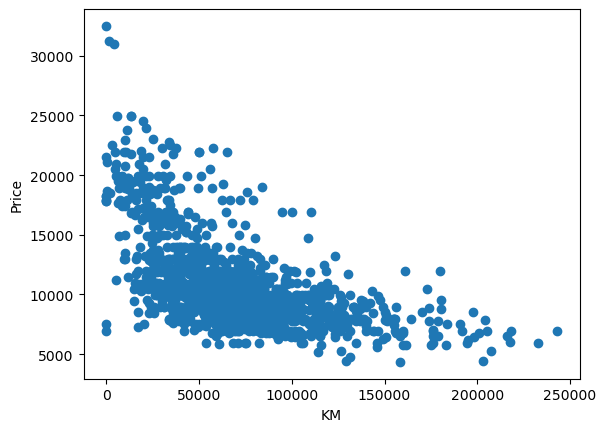

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x=df["KM"],y=df["Price"])
plt.xlabel("KM")
plt.ylabel("Price")
plt.show()

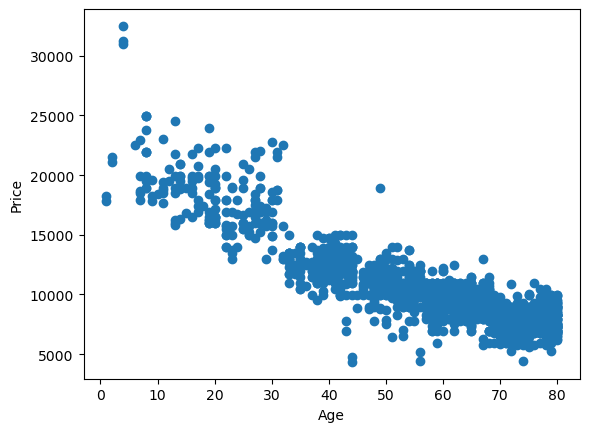

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x=df["Age_08_04"],y=df["Price"])
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

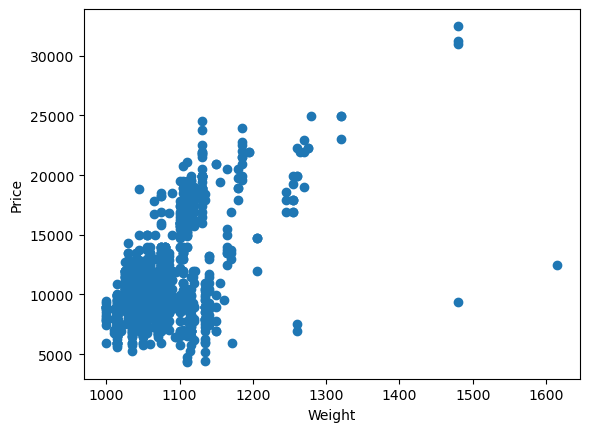

In [32]:
import matplotlib.pyplot as plt
plt.scatter(x=df["Weight"],y=df["Price"])
plt.xlabel("Weight")
plt.ylabel("Price")
plt.show()

In [33]:
#Checking if data has null values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [34]:
#Data Transformation
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Fuel_Type"] = LE.fit_transform(df["Fuel_Type"])
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [35]:
#Split the variables
X = df.iloc[:,1:]
Y = df["Price"]

In [36]:
#Standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.771966,-0.574695,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,-1.771966,0.117454,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,-1.718184,-0.715386,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,-1.610620,-0.547650,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,-1.395491,-0.801028,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883
1432,0.863362,-1.321120,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1433,0.809579,-1.374036,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1434,0.755797,-1.376703,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915


In [37]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


In [38]:
#Split the variables
SS_X=SS_X[['Age_08_04','KM','Weight','HP']]
Y = df["Price"]
SS_X

,Age_08_04,KM,Weight,HP
0,-1.771966,-0.574695,1.758561,-0.768042
1,-1.771966,0.117454,1.758561,-0.768042
2,-1.718184,-0.715386,1.758561,-0.768042
3,-1.610620,-0.547650,1.758561,-0.768042
4,-1.395491,-0.801028,1.853577,-0.768042
...,...,...,...,...
1431,0.702015,-1.279939,-0.901883,-1.035138
1432,0.863362,-1.321120,-1.091915,-1.035138
1433,0.809579,-1.374036,-1.091915,-1.035138
1434,0.755797,-1.376703,-1.091915,-1.035138


In [39]:
#Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y,random_state = 200)

In [40]:
#Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
#fit the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [41]:
#Interpret the coefficients of the model.
model.coef_

array([-2178.86042329,  -824.99423971,  1121.40963843,   436.28439014])

In [42]:
#predictions
Y_pred_test = model.predict(X_test)

In [43]:
import numpy as np
from sklearn.metrics import root_mean_squared_error,r2_score
rmse=root_mean_squared_error(Y_test,Y_pred_test)
r2=r2_score(Y_test,Y_pred_test)
print("Root Mean Squared Error:",np.round(rmse,2))
print("R2 Score:",round(r2,2))

Root Mean Squared Error: 1493.19
R2 Score: 0.81


In [44]:
#Apply Lasso and Ridge methods on the model.
#Ridge Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = root_mean_squared_error(Y_test, y_pred_ridge)
r2_ridge = r2_score(Y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print("Root Mean Squared Error:", np.round(rmse_ridge, 2))
print("R2 Score:", round(r2_ridge, 2))

Ridge Regression Metrics:
Mean Squared Error: 2229509.76
Root Mean Squared Error: 1493.15
R2 Score: 0.81


In [45]:
#Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, Y_train)
y_pred_lasso = lasso.predict(X_test)

rmse_lasso = root_mean_squared_error(Y_test, y_pred_lasso)
r2_lasso = r2_score(Y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print("Root Mean Squared Error:", np.round(rmse_lasso, 2))
print("R2 Score:", round(r2_lasso, 2))


Lasso Regression Metrics:
Root Mean Squared Error: 1492.81
R2 Score: 0.81


In [ ]:
#Interview Questions:
#1.What is Normalization & Standardization and how is it helpful?
# Ans) Normalization and Standardization are used to remove the units from the X variables and help in fitting the model.
#2.What techniques can be used to address multicollinearity in multiple linear regression?
# Ans) To avoid multicollinearity issues in MLR, we can check the VIF(Variance Inflation Factor) within the X variables.
